Olá! Neste notebook iremos tratar de diversos assuntos relacionados a Data Science com ênfase na engenharia médica. Portanto todos os tópicos serão relacionados a temas médicos. 

Estes exercícios foram feitos durante a máteria de Engenharia Médica na UNIFESP  e os códigos, todos desenvolvidos por mim.

#Probabilidade e Inferência

O primeiro tópico abordado será o de probabilidade e inferência. Então vamos para o nosso primeiro problema!


**1.** Temos um arquivo chamado "semana2_prob1.mat" (.mat é o formato para quando programamos utilizando o MATLAB, mas conseguimos abrir tranquilamente este arquivo de dados em Python) contendo em cada linha a medida de velocidade da condução nervosa (em m/s), coletado de um grupo de 200 indivíduos saudáveis. 

Neste tipo de exame, quando há suspeita de alguma doença na condução nervosa de pacientes, é feito a comparação com os dados de pacientes/indivíduos saudáveis.
Essas são as variáveis correspondentes à matriz contida no arquivo que resultam em uma amostragem aleatória de pacientes saudáveis: 

*   Linha 1: medida de condução motora (CMAP) do nervo mediano (mCMAP);
*   Linha 2: medida de condução sensorial (SNAP) do nervo mediano (mSNAP);
*   Linha 3: CMAP do nervo ulnar (uCMAP);
*   Linha 4: SNAP do nervo ulnar (uSNAP). 



In [ ]:
import scipy.io

mat=scipy.io.loadmat('/content/drive/MyDrive/Data Science/notebooks/DataScience_Clinica/semana2_prob1.mat') #carreguei o arquivo -> dict
dados=mat['dados'] # peguei os dados contendo as 4 linhas e 200 padrões (cada indivíduo é um padrão)

Vamos começar utilizando as medidas mais simples para termos as primeiras impressões deste conjunto de dados, que será a média e variância.


In [ ]:
import statistics #Para calcularmos a variância

linha_1= dados[0]
media_linha1=linha_1.mean() #Velocidade de cond. media= 58.71 (m/s)
var_linha1=statistics.variance(linha_1) #variancia = 5.07 (m^2/s^2)

linha_2= dados[1]
media_linha2=linha_2.mean() #Velocidade de cond. media= 50.09 (m/s)
var_linha2=statistics.variance(linha_2) #variancia = 4.44 (m^2/s^2)

linha_3= dados[2]
media_linha3=linha_3.mean() #Velocidade de cond. media = 55  (m/s)
var_linha3=statistics.variance(linha_3) #variancia = 1.97 (m^2/s^2)

linha_4= dados[3]
media_linha4=linha_4.mean() #Velocidade de cond. media =59.91  (m/s)
var_linha4=statistics.variance(linha_4) #variancia=2.95 (m^2/s^2)

Para quem acompanhou os meus estudos do livro "Data Science do Zero" que está disponível no meu GitHub, temos que a **média** é o metodo mais simples e rápido para a avaliação de uma tendência central, pois avalia o ponto central de um conjunto de dados. Então temos que a **velocidade média de condução de cada nervo** é de:


*   CMAP = 50.09 (m/s)
*   SNAP = 50.09 (m/s)
*   uCMAP = 55.00 (m/s)
*   uSNAP = 59.91 (m/s)



E a **variância** é uma medida de dispersão que mostra o quão distante os valores do conjunto estão do valor central médio encontrado acima. São elas:
*   CMAP = 5.07 (m^2/s^2)
*   SNAP = 4.44 (m^2/s^2)
*   uCMAP = 1.97 (m^2/s^2)
*   uSNAP = 2.95 (m^2/s^2)

Portanto, até o momento, podemos concluir que CMAP possui os valores do conjunto mais distantes do seu valor central médio e o uCMAP, mais próximos. Poderemos verificar isto também no histograma que será plotado a seguir.

Agora iremos plotar os histogramas para então testarmos a normalidade das distribuições dos dados.

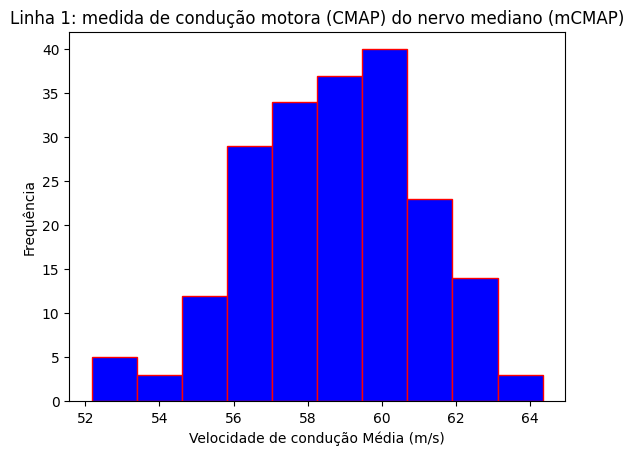

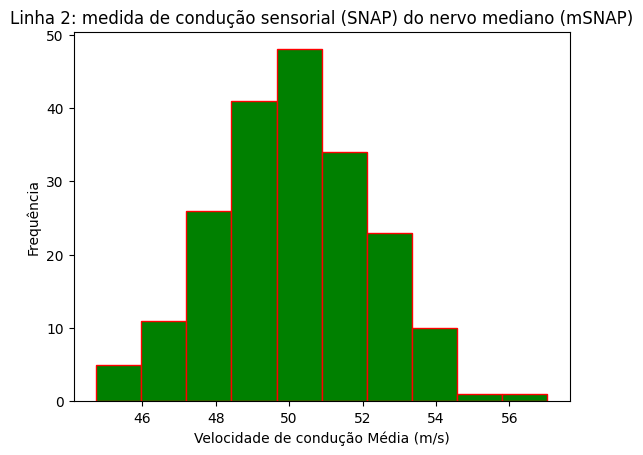

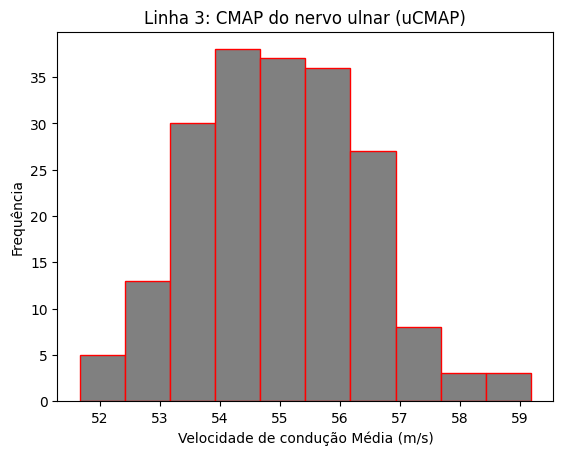

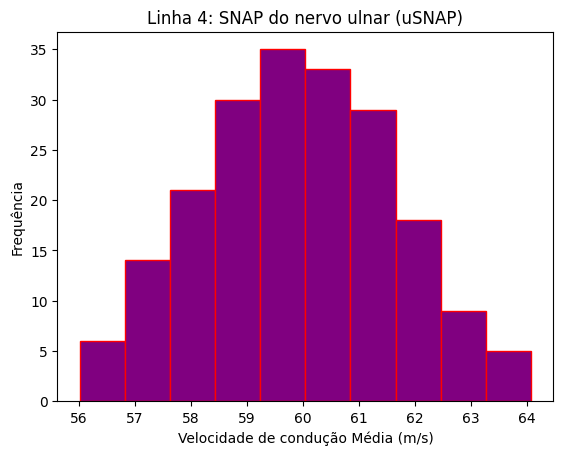

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats #Teste Shapiro-Wilk

#Linha 1 - Histograma
plt.hist(linha_1,bins=10,edgecolor="red", color="blue")
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 1: medida de condução motora (CMAP) do nervo mediano (mCMAP)")
plt.show()

#Linha 2 - Histograma
plt.hist(linha_2,bins=10,edgecolor="red", color="green")
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 2: medida de condução sensorial (SNAP) do nervo mediano (mSNAP)")
plt.show()

#Linha 3 - Histograma
plt.hist(linha_3,bins=10,edgecolor="red", color="gray")
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 3: CMAP do nervo ulnar (uCMAP)")
plt.show()

#Linha4 - Histograma
plt.hist(linha_4,bins=10,edgecolor="red", color="purple")
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 4: SNAP do nervo ulnar (uSNAP)")
plt.show()

#Teste de normalidade
#Linha 1
shapiro_test_l1 = stats.shapiro(linha_1) #[0]=statistic=0.99, [1]= pvalue=0.29
pvalue_l1=shapiro_test_l1[1]

#Linha 2
shapiro_test_l2 = stats.shapiro(linha_2) #[0]=statistic=1, [1]= pvalue=0.87
pvalue_l2=shapiro_test_l2[1]

#Linha 3
shapiro_test_l3 = stats.shapiro(linha_3) #[0]=statistic=0.99, [1]= pvalue=0.42
pvalue_l3=shapiro_test_l3[1]

#Linha 4
shapiro_test_l4= stats.shapiro(linha_4) #[0]=statistic=0.99, [1]= pvalue=0.14
pvalue_l4=shapiro_test_l4[1]


A distribuição normal também pode ser chamada de gaussiana e sua forma assemelha-se a de um sino. Para a distribuição ser normal, o p valor deve ser p>0.05. 


*   CMAP: pvalor= 0.29
*   SNAP: pvalor= 0.87
*   uCMAP: pvalor= 0.42
*   uSNAP: pvalor= 0.14



Logo todos seguem uma distribuição normal e também podemos ter uma ideia pela forma do histograma apresentado por eles acima.
Não podemos rejeitar o teste de hipótese porque é ele quem dirá se a distribuição é normal ou se segue outros padrões. Portanto é importante realizar este teste.

Agora iremos comparar os histogramas obtidos acima com as médias de um paciente com suspeita de doença nos nervos periféricos. Os resultados obtidos no paciente foram os seguintes: mCMAP = 56 m/s; mSNAP = 52 m/s; uCMAP = 54 m/s; uSNAP = 61 m/s. 

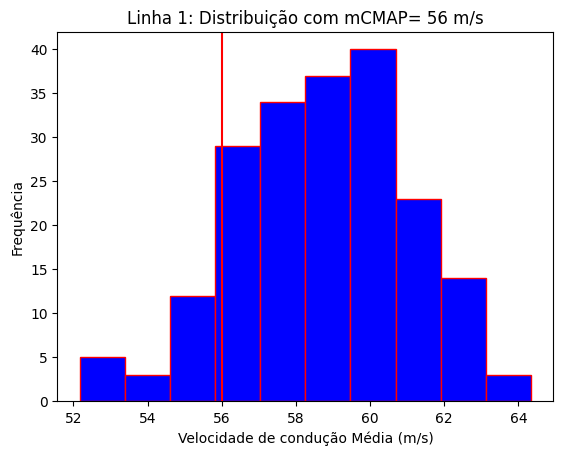

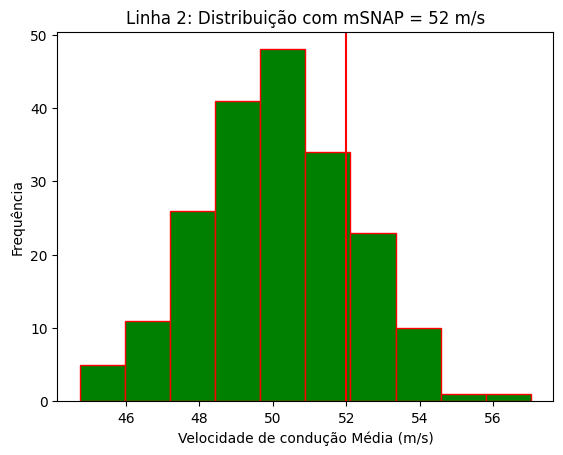

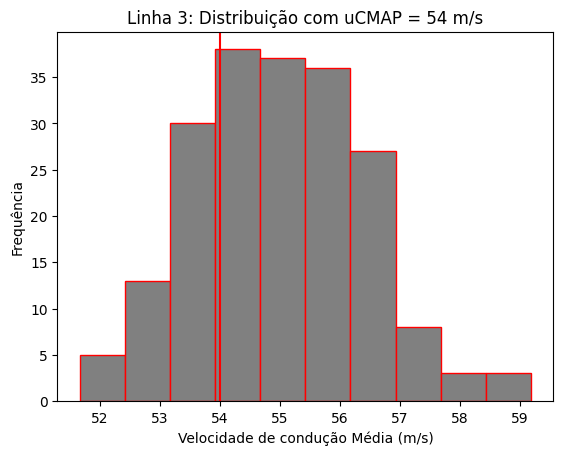

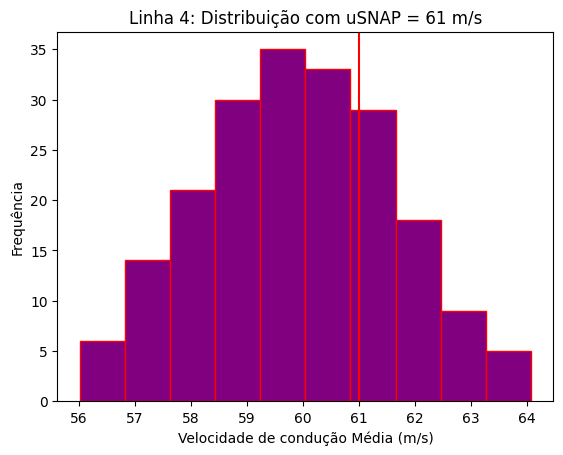

In [ ]:
#Linha 1 - Histograma
plt.hist(linha_1,bins=10,edgecolor="red", color="blue")
plt.axvline(x=56, color='red')
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 1: Distribuição com mCMAP= 56 m/s")
plt.show()

#Linha 2 - Histograma
plt.hist(linha_2,bins=10,edgecolor="red", color="green")
plt.axvline(x=52, color='red')
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 2: Distribuição com mSNAP = 52 m/s")
plt.show()

#Linha 3 - Histograma
plt.hist(linha_3,bins=10,edgecolor="red", color="gray")
plt.axvline(x=54, color='red')
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 3: Distribuição com uCMAP = 54 m/s")
plt.show()

#Linha4 - Histograma
plt.hist(linha_4,bins=10,edgecolor="red", color="purple")
plt.axvline(x=61, color='red')
plt.xlabel("Velocidade de condução Média (m/s)")
plt.ylabel("Frequência")
plt.title("Linha 4: Distribuição com uSNAP = 61 m/s")
plt.show()

Podemos ver pelo histograma acima que o paciente com suspeita de desmelienização seletiva nos nervos periféricos possui os seus valores médios um pouco longe quando comparado com os valores médios dos indivíduos saudáveis. Logo, esta suspeita pode ser verídica.

Agora vamos estimar a probabilidade de um indivíduo saudável possuir valores de condutividade abaixo dos valores obtidos neste paciente com suspeita.

In [ ]:
import numpy as np
from scipy.stats import norm 

'''CDF é a probabilidade de uma variável X possuir valores menores ou iguais a ele.
'''

P_l1_normcdf=(stats.norm.cdf(56, media_linha1,np.sqrt(var_linha1)))*100 #11.44 %
P_l2_normcdf=(stats.norm.cdf(52, media_linha2, np.sqrt(var_linha2)))*100 #81.73 %
P_l3_normcdf=(stats.norm.cdf(54, media_linha3, np.sqrt(var_linha3)))*100 #23.86 %
P_l4_normcdf=(stats.norm.cdf(61, media_linha4, np.sqrt(var_linha4)))*100 #73.78 %

Iremos utilizar a probabilidade de uma distribuição normal (norm) porque provamos com o teste de hipótese que a distribuição é normal para CMAP, SNAP, uCMAP e uSNAP. 

Para este caso, a CDF (Cumulative Distribution Function) é a indicada, pois queremos a probabilidade do indivíduo saudável possuir valores de condutividade **abaixo** dos valores obtidos no paciente com suspeita (chamarei este valor de "x" em alguns casos para facilitar o entendimento). Esta função nos dá valores iguais ou abaixo do valor "x". Já o PDF nos daria a probabilidade exata do valor "x" e não queremos isso.

Como as probabilidades deram:
* CMAP=11,44 %
* SNAP=81,73 %
* uCMAP=23,86 %
* uSNAP=73,78 %

E estão acima do limiar de 5%, **não** podemos rejeitar a hipótese de que o paciente seja saudável. Se a probabilidade fosse muito pequena, poderíamos descartar a hipótese do individuo pertencer ao grupo de pessoas saudáveis, pois isso significaria que provavelmente a condução nervosa é menor que a do paciente com suspeita.

Por fim, vamos estimar matriz de covariância entre as medidas na população de indivíduos saudáveis e ver em quais conclusões podemos chegar.

In [ ]:
#Matriz Saudável
Matriz_Saud=dados.T #transpus para ficar melhor a manipulação (em python é mais fácil manipular colunas)

#Média Matriz
mu_Matriz=Matriz_Saud.mean(0) #média de cada coluna

#Covariância Matriz
cov_Matriz=np.cov(Matriz_Saud.T)

#Matriz Paciente
Matriz_Pa=(np.matrix('56.,52.,54.,61.')) #Criei uma matriz com as médias do paciente com suspeita

#Probabilidade Multivariada Cumulada
P_Matriz_mvncdf=(stats.multivariate_normal.cdf(Matriz_Pa,mean=mu_Matriz, cov=cov_Matriz))*100 #P=2,14%

Temos que a covariância mede o quão distante os valores do conjunto x e y estão do valor central médio. Então a Probabilidade Multivariada Cumulada é a probabilidade acumulada sob a curva da distribuição normal.

Como a Probabilidado foi igual a 2,14%, sendo abaixo do limiar de 5%, podemos descartar a hipótese do paciente ser saudável.

**2.** O segundo arquivo ("semana2_prob2.mat”) contm dados de 19.476 homens com mais de 50 anos que foram submetidos a testes de câncer de próstata. ´

* Coluna 1: resultado do teste PSA (1 = positivo para a doença, 0 = negativo para a doença); 
* Coluna 2: resultado do teste de toque retal DRE (1 = positivo para a doença, 0 = negativo para doença); 
* Coluna 3 = resultado da biópsia (1 = paciente com a doença, 0 = paciente sem a doença). 

Estes dados podem ser utilizados para avaliar o potencial clínico de tais testes na população alvo.

Vamos estimar a  **sensibilidade** e **especificidade** de ambos os testes, PSA e DRE.

Podemos notar que este problema será resolvido com Bayes. Relembrando:

Sensibilidade: Probabilidade do teste ser positivo para o paciente, dado que o paciente esteja doente -> P(T=1|D=1)
Especificidade: Probabilidade do teste ser negativo para a doença, dado que o paciente não tenha a doença -> P(T=0|D=0)

P(x,y)=P(y,x)
sumxP(x,y)=P(y)
sumyP(x,y)=P(x)
P(x|y)=P(x,y)/P(y)
sumxP(x|y)=1
sumxP(x,y|z)=P(y|z)

Bayes:

P(x|y)=P(x,y)/P(y)  

P(y|x)=P(y,x)/P(x)

P(x|y)P(y)=P(x,y)   

P(y|x)P(x)=P(y,x)

P(x|y)P(y)=P(y|x)P(x)

P(x|y)=P(y|x)P(x)/P(y)

* P(x|y)-> Posteriori em x
* P(y|x)-> Velhossimilhança/likelihood em x
* P(x)-> Prior
* P(y)-> Verossimilhança marginal

In [ ]:
semana2_prob2= scipy.io.loadmat('/content/drive/MyDrive/Data Science/notebooks/DataScience_Clinica/semana2_prob2.mat')  #19.476 homens > 50 anos submetidos a testes de câncer de próstata
dados2=semana2_prob2['dados']

PSA_dados=dados2[:,0]
DRE_dados=dados2[:,1]
Biopsia_dados=dados2[:,2]

#Sensibilidade -> P(T=1|D=1)=P(T=1,D=1)/P(D=1)
PSA_t1=0
Bio_t1=0
DRE_t1=0
PSA_Bio_t1=0
DRE_Bio_t1=0

for (t,b) in zip(PSA_dados,Biopsia_dados):
    if t==1:
        PSA_t1+=1
    if b==1:
        Bio_t1+=1
    if b==1 and t==1:
        PSA_Bio_t1+=1

#Sensibilidade PSA
P_SenPSA_Bio=(PSA_Bio_t1/Bio_t1)*100 # A sensibilidade PSA=25,57%

for (t,b) in zip(DRE_dados,Biopsia_dados):
    if t==1:
        DRE_t1+=1
    if t==1 and b==1:
        DRE_Bio_t1+=1

#Sensibilidade DRE
P_Sen_DRE_Bio=(DRE_Bio_t1/Bio_t1)*100 #A sensibilidade DRE=17,76%

#Especificidade -> P(T=0|D=0)= P(T=0,D=0)/P(D=0)
PSA_t0=0
Bio_t0=0
DRE_t0=0
PSA_Bio_t0=0
DRE_Bio_t0=0

for (t,b) in zip(PSA_dados,Biopsia_dados):
    if t==0:
        PSA_t0+=1
    if b==0:
        Bio_t0+=1
    if t==0 and b==0:
        PSA_Bio_t0+=1

#Especificidade PSA
P_EspPSA_Bio=(PSA_Bio_t0/Bio_t0)*100  #A Especificidade PSA=94,91%

for (t,b) in zip(DRE_dados,Biopsia_dados):
    if t==0:
        DRE_t0+=1
    if t==0 and b==0:
        DRE_Bio_t0+=1
        
#Especificidade DRE
P_EspDRE_Bio=(DRE_Bio_t0/Bio_t0)*100 #A Especificidade DRE=93,50% 


Supondo que dados do ministério da saúde indiquem como sendo de 4,2% a prevalência do câncer de próstata em homens com mais de 50 anos. O PSA e DRE é medido em um determinado paciente de sexo masculino com mais de 50 anos: se o teste for positivo, qual a probabilidade do paciente estar doente?

In [ ]:
#Teorema de Bayes p/ estimar a doença-> P(D|T)=P(T|D)P(D)/P(T)

#Teste PSA:
#P(T=1|D=1)=25,57% PSA
#P(T=0|D=0)=94,91% PSA
#(D=1)=0,042
#(D=0)=1-0,042

#Encontrando (T=1)=P(T = 1∣D = 1)P(D = 1) + P(T = 1∣D = 0)P(D = 0)
t1d1_PSA=P_SenPSA_Bio/100
t0d1_PSA=1-(t1d1_PSA)
t0d0_PSA=P_EspPSA_Bio/100
t1d0_PSA=1-t0d0_PSA
d1_PSA=0.042
d0_PSA=1-d1_PSA

t1_PSA=(t1d1_PSA*d1_PSA)+(t1d0_PSA*d0_PSA)#(T=1)=0,0595

#Doença PSA(D=1|T=1)=P(T=1|D=1)P(D=1)/P(T=1)
P_doentePSA=((t1d1_PSA)*d1_PSA)/(t1_PSA)*100 #o paciente tem 18.04% de chance de possuir câncer se o teste PSA for positivo


#Teste DRE:
#P(T=1|D=1)=17,76% DRE
#P(T=0|D=0)=93,50% DRE
#(D=1)=0,042
#(D=0)=1-0,042

#Encontrando (T=1)=P(T = 1∣D = 1)P(D = 1) + P(T = 1∣D = 0)P(D = 0)
t1d1_DRE=P_Sen_DRE_Bio/100
t0d1_DRE=1-(t1d1_DRE)
t0d0_DRE=P_EspDRE_Bio/100
t1d0_DRE=1-t0d0_DRE
d1_DRE=0.042
d0_DRE=1-d1_DRE

t1_DRE=(t1d1_DRE*d1_DRE)+(t1d0_DRE*d0_DRE)#(T=1)=0,0697

#Doença DRE(D=1|T=1)=P(T=1|D=1)P(D=1)/P(T=1)
P_doenteDRE=((t1d1_DRE)*d1_DRE)/(t1_DRE)*100 #O paciente tem 10,70% de chance de possuir câncer se o teste DRE for positivo